In [9]:
import time
import json
import nest_asyncio
import asyncio
import websockets
import numpy as np
import math
import random
import colorsys
import io
import base64
from PIL import Image
from tqdm.notebook import tqdm
nest_asyncio.apply()

In [2]:
async def websocket_test(payload, indent=None, quiet=False):
    uri = "ws://127.0.0.1:8765/ws"
    async with websockets.connect(uri) as ws:
        await ws.send(json.dumps(payload))
        if not quiet:
            print("✅ send:", payload)

        try:
            # 5 秒以内に返事が来なければ TimeoutError
            response = await asyncio.wait_for(ws.recv(), timeout=5)
            if not quiet:
                if indent:
                    print("📨 recv: ", json.dumps(json.loads(response), indent=indent, ensure_ascii=False))
                else:
                    print("📨 recv:", response)
            return json.loads(response)
        except asyncio.TimeoutError:
            print("⏰ タイムアウト（5 秒以内にメッセージが来ませんでした）")

In [4]:
payload = {
    "type": "screenshot",
    "width": 854,
    "height": 480,
}
response = await websocket_test(payload)

✅ send: {'type': 'screenshot', 'width': 854, 'height': 480}
📨 recv: {"type":"success","message":"Screenshot captured successfully","data":{"image":"iVBORw0KGgoAAAANSUhEUgAAA1YAAAHgCAYAAACmUPwqAAAgAElEQVR4AeS9WYylSXaYF/fmzXvz5r7WXl3VXd093T09Mxw2Z0YkRZqkCFgybciALEMQBMsLBEJ6EAHbevODYQEy+GAYejEfDBOwYNpcYEAgZIAGSdAWTUsih+RMzzSnp9faq3Lf983fd+JG5l+3blZlzfRQNhyZ/434YzlxYj8nzon4a7/6W989TsUc4zw+SrXD3VTfXEiN2fdSbeV2qm0vprS3nmoHGykd7RBnj+eAVEcRPyfPYI6wDo9q6f5yM717v5kerdTTylZKa9spre+mtLl7nLb2U9onr0Oz8+HP31NTfS/+xS6xqu9VdwnXLv7FrobVqi/ndPeCU036ojCfB68aLuzqezXfqv9ZOFTjlLS9/ErYi9jnhXPeeM/Lu7uM3e+m7+V3ln933NP32qkzkLK/npquwAjo9nvR9wK9pCt2t/953kvaYvdKc1ZY8S+2aavuAqvb/8k4tZIGb90ltC40Xvr5afWlNNispcGBlMYG9tNb14/Smzdn0q3LF9Laxmq6PfswDQyOppuXL6fJkXba2l5NmztrjIZDoOTZo8A9waq74U4Cuh1PpQQifrSzTR3z03EtNer9qdUYSK3+odRqtlO93kwrmxuBx+7+Zmo29tLU+GiauXQ5jU9Op1pfI80+mkubq2up2defhtqDabA1mPrrjbS6s5e2j47SJPEPDg/T6tom+eSOFb8d3B8vLaahgRZ59ael1ZX0e+8upv39dto76Eu7e820tXOcNreP0sbWcVrn2WCO3WFuPWBaPgLns01XGK+1GjnXKXnj0zR+7UI6BM9a

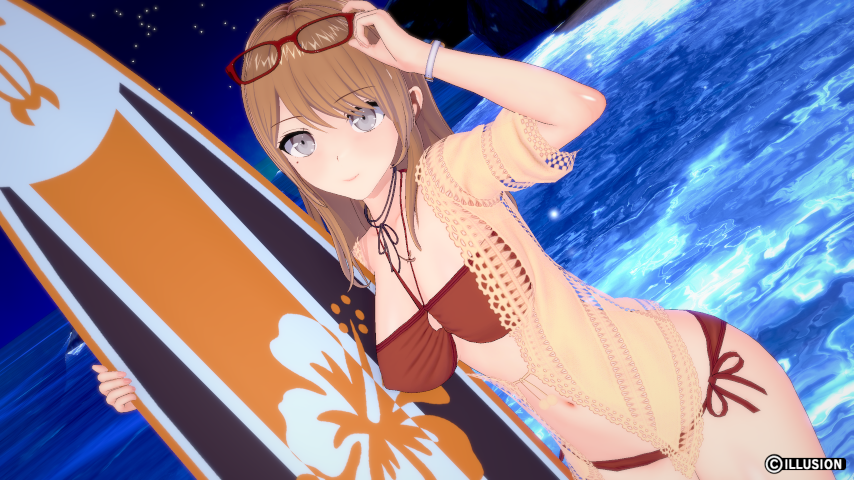

In [10]:
binary_data = base64.b64decode(response["data"]["image"])
image = Image.open(io.BytesIO(binary_data))
display(image)